# Titanic Passenger Data Analysis #

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
g_sub = pd.read_csv("gender_submission.csv")

## Visulaizing Data ##

In [4]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
470,471,0,3,"Keefe, Mr. Arthur",male,NaN,0,0,323592,7.2500,NaN,S
69,70,0,3,"Kink, Mr. Vincenz",male,26.0,2,0,315151,8.6625,NaN,S
517,518,0,3,"Ryan, Mr. Patrick",male,NaN,0,0,371110,24.1500,NaN,Q
450,451,0,2,"West, Mr. Edwy Arthur",male,36.0,1,2,C.A. 34651,27.7500,NaN,S
374,375,0,3,"Palsson, Miss. Stina Viola",female,3.0,3,1,349909,21.0750,NaN,S


In [5]:
g_sub.sample(10)

,PassengerId,Survived
31,923,0
403,1295,0
378,1270,0
338,1230,0
290,1182,0
146,1038,0
251,1143,0
386,1278,0
360,1252,0
284,1176,1


In [6]:
test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
230,1122,2,"Sweet, Mr. George Frederick",male,14.0,0,0,220845,65.0000,NaN,S
75,967,1,"Keeping, Mr. Edwin",male,32.5,0,0,113503,211.5000,C132,C
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
163,1055,3,"Pearce, Mr. Ernest",male,NaN,0,0,343271,7.0000,NaN,S
181,1073,1,"Compton, Mr. Alexander Taylor Jr",male,37.0,1,1,PC 17756,83.1583,E52,C


In [7]:
train.Fare.sample(5)

65     15.2458
286     9.5000
284    26.0000
33     10.5000
411     6.8583
Name: Fare, dtype: float64

### Bar Chart for no people that survived from different age group

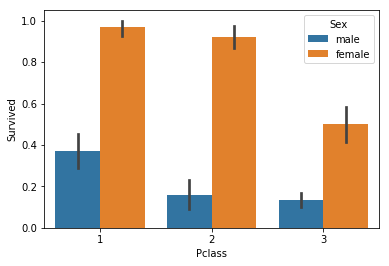

In [8]:
sns.barplot(x = "Pclass", y = "Survived", hue = "Sex", data = train)

### Removing the missing value form the Age column and Categorising the Age

In [9]:
#simplyfing Age
def simplify_ages(df):
    #df.Age.cat.add_categories([-1])
    
    df.Age = df.Age.fillna(df['Age'].median())
    bins = (0, 5, 12, 18, 25, 35, 60, 120)
    group_names = ['Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    categories = pd.cut(df.Age, bins, labels=group_names)
    df.Age = categories
    return df

In [10]:
train = simplify_ages(train)
test = simplify_ages(test)

In [11]:
type(train.Age)

pandas.core.series.Series

In [15]:
train.sample(5)
test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
255,1147,3,"MacKay, Mr. George William",male,Young Adult,0,0,C.A. 42795,7.5500,NaN,S
29,921,3,"Samaan, Mr. Elias",male,Young Adult,2,0,2662,21.6792,NaN,C
50,942,1,"Smith, Mr. Lucien Philip",male,Student,1,0,13695,60.0000,C31,S
244,1136,3,"Johnston, Master. William Arthur Willie""""",male,Young Adult,1,2,W./C. 6607,23.4500,NaN,S
368,1260,1,"Gibson, Mrs. Leonard (Pauline C Boeson)",female,Adult,0,1,112378,59.4000,NaN,C


### No of Survivors from differnet Age Groups - Bar Plot

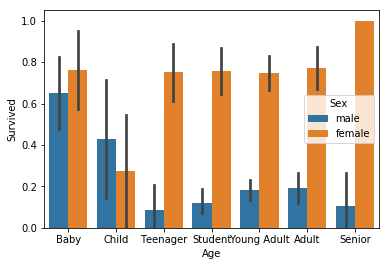

In [16]:
sns.barplot(x = 'Age', y = "Survived", hue = "Sex", data = train)

### Preprocessing the cabin Column for use

In [18]:
def simplify_cabins(df):
    df.Cabin = df.Cabin.fillna('N')
    df.Cabin = df.Cabin.apply(lambda x: x[0])
    return df

In [19]:
train = simplify_cabins(train)
test = simplify_cabins(test)

In [20]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,Young Adult,0,0,330911,7.8292,N,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,Adult,1,0,363272,7.0000,N,S
2,894,2,"Myles, Mr. Thomas Francis",male,Senior,0,0,240276,9.6875,N,Q
3,895,3,"Wirz, Mr. Albert",male,Young Adult,0,0,315154,8.6625,N,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,Student,1,1,3101298,12.2875,N,S


### Removing the missing value and Categorising the Fare column

In [21]:
def simplify_Fares(df):
    df.Fare = df.Fare.fillna(df.Fare.median())
    bins = (-1,0,10,20,30,1000)
    label = ("Unknown", "grade1", "grade2", "grade3", "grade4")
    category = pd.cut(df.Fare, bins, labels = label)
    df.Fare = category
    return df

In [22]:
train = simplify_Fares(train)
test = simplify_Fares(test)

In [23]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,Student,1,0,A/5 21171,grade1,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Adult,1,0,PC 17599,grade4,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,Young Adult,0,0,STON/O2. 3101282,grade1,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Young Adult,1,0,113803,grade4,C,S
4,5,0,3,"Allen, Mr. William Henry",male,Young Adult,0,0,373450,grade1,N,S


### Formating Names

In [24]:
def format_names(df):
    df['lname'] = df.Name.apply(lambda x: x.split(' ')[0])
    df['fname'] = df.Name.apply(lambda x: x.split(' ')[1])
    return df

In [25]:
train = format_names(train)
test = format_names(test)

In [26]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lname,fname
0,892,3,"Kelly, Mr. James",male,Young Adult,0,0,330911,grade1,N,Q,"Kelly,",Mr.
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,Adult,1,0,363272,grade1,N,S,"Wilkes,",Mrs.
2,894,2,"Myles, Mr. Thomas Francis",male,Senior,0,0,240276,grade1,N,Q,"Myles,",Mr.
3,895,3,"Wirz, Mr. Albert",male,Young Adult,0,0,315154,grade1,N,S,"Wirz,",Mr.
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,Student,1,1,3101298,grade2,N,S,"Hirvonen,",Mrs.


In [27]:
def drop_features(df):
    return df.drop(['Ticket','Embarked','Name'],axis = 1)

In [28]:
train = drop_features(train)
test = drop_features(test)

In [29]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,lname,fname
0,1,0,3,male,Student,1,0,grade1,N,"Braund,",Mr.
1,2,1,1,female,Adult,1,0,grade4,C,"Cumings,",Mrs.
2,3,1,3,female,Young Adult,0,0,grade1,N,"Heikkinen,",Miss.
3,4,1,1,female,Young Adult,1,0,grade4,C,"Futrelle,",Mrs.
4,5,0,3,male,Young Adult,0,0,grade1,N,"Allen,",Mr.


In [30]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,lname,fname
0,892,3,male,Young Adult,0,0,grade1,N,"Kelly,",Mr.
1,893,3,female,Adult,1,0,grade1,N,"Wilkes,",Mrs.
2,894,2,male,Senior,0,0,grade1,N,"Myles,",Mr.
3,895,3,male,Young Adult,0,0,grade1,N,"Wirz,",Mr.
4,896,3,female,Student,1,1,grade2,N,"Hirvonen,",Mrs.


## Encoding using Label Encoder

In [37]:
from sklearn import preprocessing

def encode_features(df_train, df_test):
    features = ['Fare', 'Cabin', 'Age', 'Sex', 'lname', 'fname']
    df_combined = pd.concat([df_train[features], df_test[features]])
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
        df_test[feature] = le.transform(df_test[feature])
    return df_train, df_test
    
train, test = encode_features(train, test)
train.head()

    

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,lname,fname
0,1,0,3,1,4,1,0,1,7,100,19
1,2,1,1,0,0,1,0,4,2,182,20
2,3,1,3,0,6,0,0,1,7,329,16
3,4,1,1,0,6,1,0,4,2,267,20
4,5,0,3,1,6,0,0,1,7,15,19


In [38]:
from sklearn.model_selection import train_test_split
X = train.drop(['PassengerId','Survived'],axis =1)
Y = train.Survived

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)


### Random Forest Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

 
clf = RandomForestClassifier()


parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }


acc_scorer = make_scorer(accuracy_score)


grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, Y_train)


clf = grid_obj.best_estimator_

clf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=6, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [40]:
predictions = clf.predict(X_test)
print(accuracy_score(Y_test, predictions))



0.815642458101


In [50]:
pid = test['PassengerId']
predictions = clf.predict(test.drop('PassengerId',axis = 1))

result = pd.DataFrame({'PassengerId' : pid, 'Survived': predictions})
result.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


In [51]:
len(result)

418

In [54]:
pd.DataFrame({'PassengerId' : pid, 'Survived': predictions}).to_csv("result.csv")